Iteration 1, loss = 1.88859498
Iteration 2, loss = 1.50376586
Iteration 3, loss = 1.33782335
Iteration 4, loss = 1.21623082
Iteration 5, loss = 1.11280912
Iteration 6, loss = 1.01708972
Iteration 7, loss = 0.92104082
Iteration 8, loss = 0.83643079
Iteration 9, loss = 0.75736606
Iteration 10, loss = 0.68661511
Iteration 11, loss = 0.62086977
Iteration 12, loss = 0.57376188
Iteration 13, loss = 0.52246303
Iteration 14, loss = 0.46964331
Iteration 15, loss = 0.42566016
Iteration 16, loss = 0.39522694
Iteration 17, loss = 0.36065977
Iteration 18, loss = 0.32873355
Iteration 19, loss = 0.29596977
Iteration 20, loss = 0.27750973
Iteration 21, loss = 0.25949094
Iteration 22, loss = 0.23221421
Iteration 23, loss = 0.21455908
Iteration 24, loss = 0.19970878
Iteration 25, loss = 0.18028452
Iteration 26, loss = 0.16464482
Iteration 27, loss = 0.15652440
Iteration 28, loss = 0.14456939
Iteration 29, loss = 0.14042944
Iteration 30, loss = 0.12945664
Iteration 31, loss = 0.12594793
Iteration 32, los

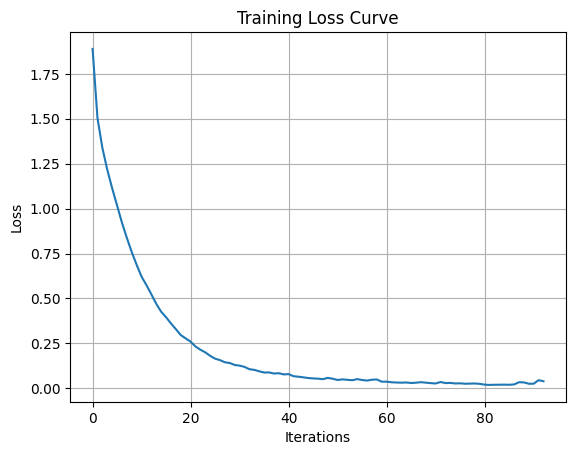

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Bangladesh-Crime-Dataset.csv")

# Separate features and target
y = df['crime']
X = df.drop(columns=['crime'])

# One-hot encode all categorical features automatically
X_encoded = pd.get_dummies(X)

# Encode the target label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build and train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, verbose=True, random_state=42)
mlp.fit(X_train, y_train)

# Prediction and evaluation
y_pred = mlp.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Plot training loss curve
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2171 - loss: 2.9686 - val_accuracy: 0.3375 - val_loss: 2.2223
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4520 - loss: 2.0209 - val_accuracy: 0.3812 - val_loss: 1.9782
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5481 - loss: 1.6646 - val_accuracy: 0.4582 - val_loss: 1.7907
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6403 - loss: 1.3687 - val_accuracy: 0.4876 - val_loss: 1.6222
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7077 - loss: 1.1887 - val_accuracy: 0.5418 - val_loss: 1.5358
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7519 - loss: 1.0781 - val_accuracy: 0.5789 - val_loss: 1.4477
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7867 - loss: 0.9868 - val_accuracy: 0.6093 - val_loss: 1.4038
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8101 - loss: 0.9082 - val_accuracy: 0.

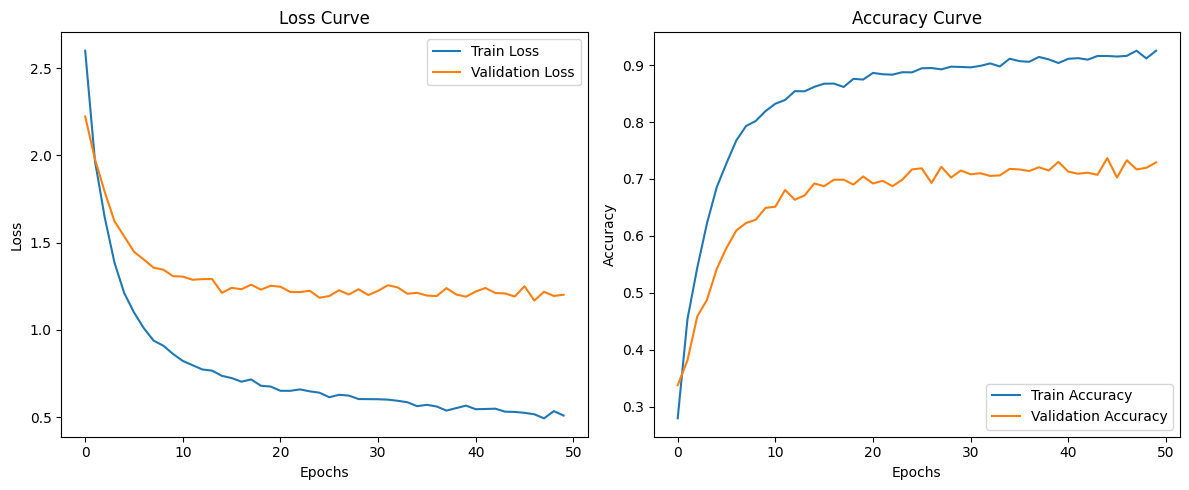

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ---------------------------
# Load and Prepare the Data
# ---------------------------
df = pd.read_csv("Bangladesh-Crime-Dataset.csv")

# Separate target and features
y = df['crime']
X = df.drop(columns=['crime'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Label encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Get number of output classes
num_classes = len(np.unique(y_encoded))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# ---------------------------
# Build the Keras Model
# ---------------------------
model = Sequential([
    Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01) , input_shape=(X_train.shape[1],)),

    Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),


    Dense(num_classes, activation='softmax')  # Multiclass output
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ---------------------------
# Train the Model
# ---------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# ---------------------------
# Evaluate the Model
# ---------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ---------------------------
# Plot Training History
# ---------------------------
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
